<a href="https://colab.research.google.com/github/Elmahi92/A-hybrid-model-including-independent-component-analysis-and-neural-network-for-forecasting-/blob/main/A_hybrid_model_including_independent_component_analysis_and_neural_network_for_forecasting_temperature_in_Sweden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A hybrid model including independent component analysis and neural network for forecasting temperature in Sweden

Independent component analysis (ICA) is used to separate blind sources of data. In fact, independent component analysis converts complicated and dependent variables to independent variables whose prediction would be easier. Then the idea of this research is to use a hybrid model including ICA and neural network to forecast data. In complicated and dependent data, ICA can first be used as a technique to recognize the independent source of data and then use different models like neural networks to forecast independent data. The main purpose of this research is to investigate the following research questions:

1. Evaluate and compare the performance of different hybrid model to forecast temperature in Sweden.

2. Apply this model to forecast other Applications (financial dataset) if applicable.

3. Adopting algorithms to spark framework to make them more efficient.


In this research project, our focus is on assessing the performance of various forecasting models for weather data across four cities in Sweden (Malmö, Stockholm, Gothenburg, and Uppsala). The primary objective is to conduct a comparative analysis among different models, considering key evaluation metrics, specifically the Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE). These metrics serve as crucial indicators for evaluating the accuracy of predictions, as outlined below.

### Mean Squared Error (MSE):
- **Definition:** MSE is a measure of the average squared difference between predicted values and the actual values.
- **Calculation:** For a set of predictions $\( \hat{y}_i \)$ and actual values $\( y_i \)$ for $\( i = 1, 2, ..., n \)$, MSE is calculated as:
  $\[ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 \]$
- **Properties:**
  - It penalizes larger errors more heavily than smaller errors due to the squaring.
  - It is always non-negative, and a value of 0 indicates a perfect prediction.

### Mean Absolute Percentage Error (MAPE):
- **Definition:** MAPE measures the average absolute percentage difference between predicted and actual values.
- **Calculation:** For a set of predictions $\( \hat{y}_i \)$ and actual values $\( y_i \)$ for $\( i = 1, 2, ..., n \)$, MAPE is calculated as:
  $\[ \text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{\hat{y}_i - y_i}{y_i} \right| \times 100\% \]$
- **Properties:**
  - MAPE is expressed as a percentage, making it interpretable and easy to understand.
  - It is sensitive to large percentage errors and can be influenced by zero or small actual values.

### Interpretation:
- **MSE:** A lower MSE indicates better model performance. However, it may not be as intuitive in terms of scale since it involves squared differences.
- **MAPE:** A lower MAPE also indicates better model performance, and it is expressed as a percentage, making it more interpretable. However, it has limitations when dealing with actual values close to or equal to zero.

When evaluating forecasting models, it's common to consider both MSE and MAPE to get a comprehensive understanding of prediction accuracy, as they capture different aspects of errors in predictions.

### Dataset:

The Meteostat Python library is a powerful tool for accessing and analyzing historical weather and climate data. It provides a seamless interface to Meteostat's vast archive of meteorological data, enabling you to retrieve and manipulate weather observations from thousands of stations worldwide.

Key features of the Meteostat Python library include:

1. **Efficient Data Retrieval:** The library offers efficient mechanisms for fetching weather data, allowing you to retrieve historical records and climate statistics with ease.
2. **Integration with Pandas:** The library seamlessly integrates with Pandas, a popular data analysis framework in Python. This enables you to handle and manipulate weather data using familiar Pandas data structures and operations.
3. **Wide Range of Data Sources:** The library provides access to data from various sources, including national weather services like NOAA and DWD, ensuring a comprehensive coverage of meteorological data.
4. **Flexible Data Filtering:** The library allows to filter and customize your data retrieval based on various criteria, such as location, time range, and specific weather parameters.
5. **Versatile Data Analysis:** The library empowers to perform various data analysis tasks, such as visualizing trends, identifying patterns, and extracting insights from weather data.

In this analysis, we will utilize Air Temperature dataset spanning from January 2000 to December 2022 on a daily basis, focusing on the specified cities (Malmö, Stockholm, Gothenburg, and Uppsala). The dataset aggregates information from various weather stations within each city to provide a comprehensive analysis of weather patterns over the specified timeframe.



In [5]:
## Setup

!pip install meteostat
!pip install arch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 6.0 MB/s eta 0:00:00


In [5]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 openjdk-8-jre-headless amd64 8u392-ga-1~22.04 [30.8 MB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 openjdk-8-jdk-headless amd64 8u392-ga-1~22.04 [8,863 kB]
Fetched 39.7 

In [6]:
!java -version

openjdk version "11.0.21" 2023-10-17
OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)


In [7]:
!wget https://archive.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz

--2024-01-19 00:29:10--  https://archive.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 232530699 (222M) [application/x-gzip]
Saving to: ‘spark-2.4.5-bin-hadoop2.7.tgz’

spark-2.4.5-bin-had 100%[===================>] 221.76M  20.1MB/s    in 27s     

2024-01-19 00:29:38 (8.27 MB/s) - ‘spark-2.4.5-bin-hadoop2.7.tgz’ saved [232530699/232530699]



In [8]:
!tar xvf spark-2.4.5-bin-hadoop2.7.tgz

spark-2.4.5-bin-hadoop2.7/
spark-2.4.5-bin-hadoop2.7/licenses/
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-jtransforms.html
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-zstd-jni.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-xmlenc.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-vis.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-spire.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-sorttable.js.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-slf4j.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-scopt.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-scala.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-sbt-launch-lib.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-respond.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-reflectasm.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-pyrolite.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-py4j.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-protobuf.txt
spark-2.4.5-bin-hadoop2.7/licenses/LICENSE-pmml-model

In [9]:
!ls spark-2.4.5-bin-hadoop2.7

bin   data	jars	    LICENSE   NOTICE  R		 RELEASE  yarn
conf  examples	kubernetes  licenses  python  README.md  sbin


In [10]:
!pip install -q findspark

In [11]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [12]:
import findspark
findspark.init()

In [13]:
findspark.find()

'/content/spark-2.4.5-bin-hadoop2.7'

In [14]:
!pip install pyspark==3.1.1 cloudpickle==1.6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 7.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767583 sha256=c5009f93548db494ce810d87fbe7c16c5e3517cac777a78fe5845386d52dc0e6
  Stored in directory: /root/.cache/pip/wheels/a0/3f/72/8efd988f9ae041f051c75e6834cd92dd6d13a726e206e8b6f3
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.0
    Uninstalling pyspark-3.5.0:
      Successfully uninstalled pyspark-3.5.0
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
ERROR: pip's depende

In [1]:
import pyspark
sc = pyspark.SparkContext(appName="myAppName")

data = [1, 2, 3, 4, 5]

rdd = sc.parallelize(data)

rdd.collect()


[1, 2, 3, 4, 5]

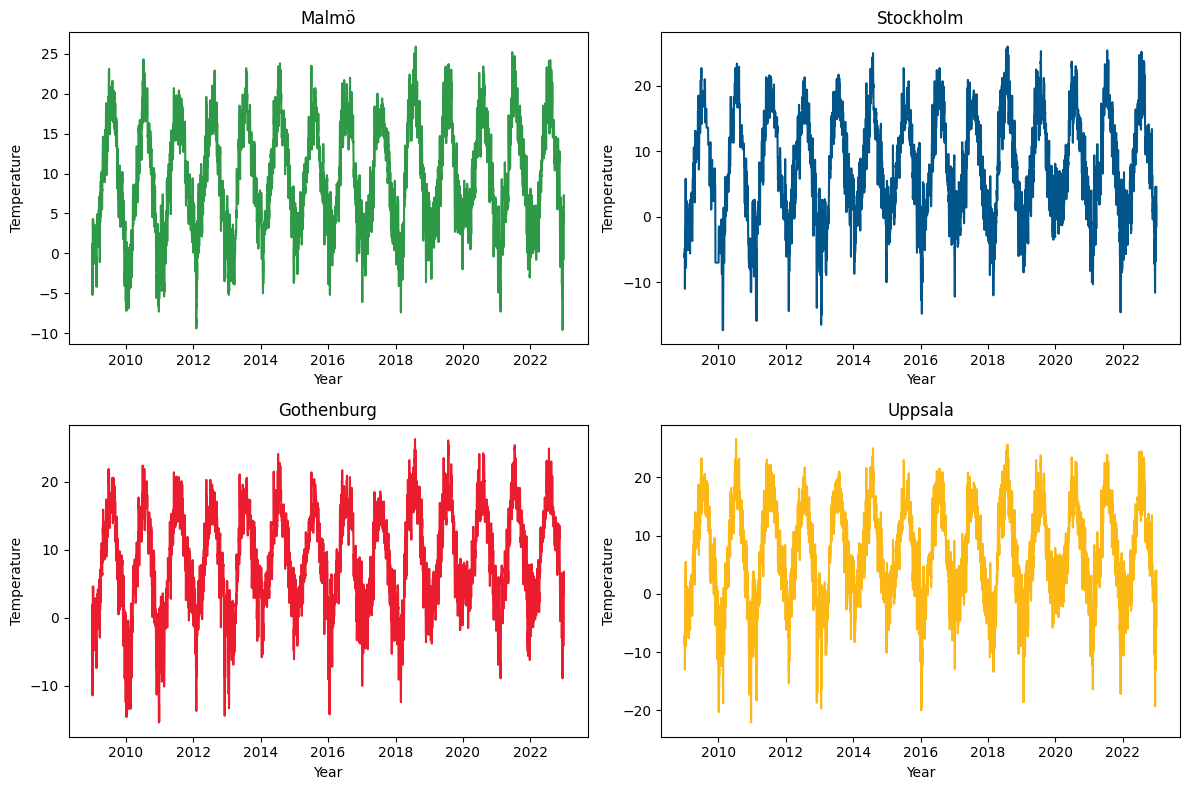

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

start = datetime(2009, 1, 1)
end = datetime(2022, 12, 30)

# Function to fetch weather data for a given city
def fetch_weather_data(latitude, longitude, city_name):
    location = Point(latitude, longitude)
    data = Daily(location, start, end).fetch()
    weather_data = pd.DataFrame({
        'Day': data.index,
        'City': city_name,
        'Temperature': data['tavg']
    })
    # Interpolate missing data points using linear interpolation
    weather_data.interpolate(method='bfill', inplace=True)
    return weather_data.dropna()

# Fetch weather data for each city
weather_data_malmo = fetch_weather_data(55.6050, 13.0038, 'Malmö')
weather_data_stockholm = fetch_weather_data(59.3293, 18.0686, 'Stockholm')
weather_data_gothenburg = fetch_weather_data(57.7089, 11.9746, 'Gothenburg')
weather_data_uppsala = fetch_weather_data(59.8585, 17.6389, 'Uppsala')

# Resample all data frames to daily frequency and drop missing data points
weather_data_malmo = weather_data_malmo.resample('D').mean().dropna()
weather_data_stockholm = weather_data_stockholm.resample('D').mean().dropna()
weather_data_gothenburg = weather_data_gothenburg.resample('D').mean().dropna()
weather_data_uppsala = weather_data_uppsala.resample('D').mean().dropna()


# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot temperature for Malmö
axs[0, 0].plot(weather_data_malmo['Temperature'], color='#2E9947')
axs[0, 0].set_title('Malmö')

# Plot temperature for Stockholm
axs[0, 1].plot(weather_data_stockholm['Temperature'], color='#00558B')
axs[0, 1].set_title('Stockholm')

# Plot temperature for Gothenburg
axs[1, 0].plot(weather_data_gothenburg['Temperature'], color='#EB1C2E')
axs[1, 0].set_title('Gothenburg')

# Plot temperature for Uppsala
axs[1, 1].plot(weather_data_uppsala['Temperature'], color='#FCB815')
axs[1, 1].set_title('Uppsala')

# Set common labels
for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='Temperature')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [2]:
import pandas as pd
from scipy.stats import skew, kurtosis, jarque_bera
from tabulate import tabulate

# Assuming you have the weather_data_* datasets available

# Function to generate a summary report for a given city
def generate_city_summary(city_name, weather_data):
    summary = f"### {city_name}:\n"
    summary += f"- **Data Points:** {len(weather_data)}\n"
    summary += f"- **Temperature Statistics:**\n\n"
    summary += tabulate([
        ['Mean', weather_data['Temperature'].mean()],
        ['Median', weather_data['Temperature'].median()],
        ['Maximum', weather_data['Temperature'].max()],
        ['Minimum', weather_data['Temperature'].min()],
        ['Std. Dev.', weather_data['Temperature'].std()],
        ['Skewness', skew(weather_data['Temperature'])],
        ['Kurtosis', kurtosis(weather_data['Temperature'])],
        ['Jarque–Bera', jarque_bera(weather_data['Temperature'])[0]],
        ['Observations', len(weather_data)],
    ], headers=['Statistic', 'Value'], tablefmt='github')
    summary += "\n\n"
    return summary

# Generate city-wise summaries
malmo_summary = generate_city_summary('Malmö', weather_data_malmo)
stockholm_summary = generate_city_summary('Stockholm', weather_data_stockholm)
gothenburg_summary = generate_city_summary('Gothenburg', weather_data_gothenburg)
uppsala_summary = generate_city_summary('Uppsala', weather_data_uppsala)

# Overall report
overall_report = (
    "## Summary Observations City -Wise\n\n"
    f"{malmo_summary}{stockholm_summary}{gothenburg_summary}{uppsala_summary}"
)

# Print or save the overall report as needed
print(overall_report)


## Summary Observations City -Wise

### Malmö:
- **Data Points:** 5112
- **Temperature Statistics:**

| Statistic    |       Value |
|--------------|-------------|
| Mean         |    9.60215  |
| Median       |    9.5      |
| Maximum      |   25.9      |
| Minimum      |   -9.6      |
| Std. Dev.    |    6.6909   |
| Skewness     |   -0.067592 |
| Kurtosis     |   -0.856066 |
| Jarque–Bera  |  159.989    |
| Observations | 5112        |

### Stockholm:
- **Data Points:** 5112
- **Temperature Statistics:**

| Statistic    |       Value |
|--------------|-------------|
| Mean         |    7.69092  |
| Median       |    7.2      |
| Maximum      |   26        |
| Minimum      |  -17.3      |
| Std. Dev.    |    7.93031  |
| Skewness     |   -0.130567 |
| Kurtosis     |   -0.635985 |
| Jarque–Bera  |  100.678    |
| Observations | 5112        |

### Gothenburg:
- **Data Points:** 5112
- **Temperature Statistics:**

| Statistic    |       Value |
|--------------|-------------|
| Mean     

## Defining our models functions:

In this analyisi we aim to forecast our data set using a set of different models in each model we calculate the mse and MAPE to compare between the models when predicting our forecasted data, the models included here are:

Here's a brief summary of the mentioned models:

1. **ARIMA (AutoRegressive Integrated Moving Average):**
   - **Type:** Time series forecasting model.
   - **Characteristics:** Utilizes past values in the time series to make predictions, involving autoregressive and moving average components.
   - **Application:** Effective for stationary time series data with a clear trend or seasonality.

2. **GARCH (Generalized Autoregressive Conditional Heteroskedasticity):**
   - **Type:** Econometric model used in finance for volatility forecasting.
   - **Characteristics:** Models the volatility of financial returns, accounting for time-varying volatility.
   - **Application:** Commonly employed in financial markets to predict and manage risk.

3. **ARIMA-GARCH:**
   - **Type:** Hybrid model combining features of ARIMA and GARCH.
   - **Characteristics:** Incorporates both time series and volatility components, making it suitable for datasets with both trends and changing variances.
   - **Application:** Particularly useful in financial time series forecasting.

4. **KNN (K-Nearest Neighbors):**
   - **Type:** Machine learning algorithm.
   - **Characteristics:** Classifies or predicts based on the majority class of its k-nearest neighbors in the feature space.
   - **Application:** Versatile algorithm used for classification and regression tasks in various domains.

5. **RNN (Recurrent Neural Network):**
   - **Type:** Deep learning model for sequence data.
   - **Characteristics:** Incorporates feedback loops, allowing information persistence, making it suitable for sequential and time series data.
   - **Application:** Effective in tasks such as natural language processing and time series forecasting.

6. **ICA-RNN (Independent Component Analysis - Recurrent Neural Network):**
   - **Type:** Hybrid model combining Independent Component Analysis and Recurrent Neural Network.
   - **Characteristics:** Utilizes ICA for feature extraction before feeding the data into an RNN for sequential processing.
   - **Application:** Useful in scenarios where independent components need to be identified before sequential modeling.


In [6]:
import requests
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.decomposition import FastICA
from sklearn.preprocessing import MinMaxScaler



# ARIMA Model
def arima_model(data):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    model = ARIMA(train, order=(5, 1, 2))
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test))
    mse = mean_squared_error(test, predictions)
    mape = mean_absolute_error(test, predictions) / np.mean(np.abs(test))
    return mse, mape


# GARCH Model
def garch_model(data):
    # split into train/test
    n_test = int(len(data) * 0.8)
    train, test = data[:-n_test], data[-n_test:]
    # define model
    model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
    # fit model
    model_fit = model.fit()
    # forecast the test set
    forecasts = model_fit.forecast(horizon=n_test)
    # plot the actual variance
    predictions = np.sqrt(forecasts.variance.values[-1, :])
    mse = mean_squared_error(test, predictions)
    mape = mean_absolute_error(test, predictions) / np.mean(np.abs(test))
    return mse, mape


# ARIMA-GARCH Model
def arima_garch_model(data):
    # Combine ARIMA and GARCH models
    arima_mse, arima_mape = arima_model(data)
    garch_mse, garch_mape = garch_model(data)
    combined_mse = arima_mse + garch_mse
    combined_mape = arima_mape + garch_mape
    return combined_mse, combined_mape


# KNN Model
def knn_model(data):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    train = train.values.reshape(-1, 1)
    test = test.values.reshape(-1, 1)
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)
    X_train, y_train = train_scaled[:-1], train_scaled[1:]
    X_test, y_test = test_scaled[:-1], test_scaled[1:]
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_error(y_test, predictions) / np.mean(np.abs(y_test))
    return mse, mape


# LSTM Model
def rnn_model(data):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    train = train.values.reshape(-1, 1)
    test = test.values.reshape(-1, 1)
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.transform(test)
    X_train, y_train = train_scaled[:-1], train_scaled[1:]
    X_test, y_test = test_scaled[:-1], test_scaled[1:]

    # Reshape data for LSTM model
    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    predictions = model.predict(X_test, verbose=0)

    mse = mean_squared_error(y_test, predictions)
    mape = mean_absolute_error(y_test, predictions) / np.mean(np.abs(y_test))
    return mse, mape




## ICA-RNN

### ICA

Independent Component Analysis (ICA) is a statistical technique used for blind source separation, particularly in signal processing and data analysis. The goal of ICA is to decompose a multivariate signal into additive, independent components. It assumes that the observed data is a linear combination of independent sources, and the objective is to estimate these sources. ICA is widely used in various fields, including image processing, speech recognition, and neuroscience.

ICA is applied to synthetic temperature signals from different cities. The mixed signals are generated by linearly combining the original city signals. The ICA algorithm is then used to separate these mixed signals into independent components, each representing a unique city signal. The results are visualized by comparing the original signals, mixed signals, independent components, and the reconstructed signals after applying ICA.

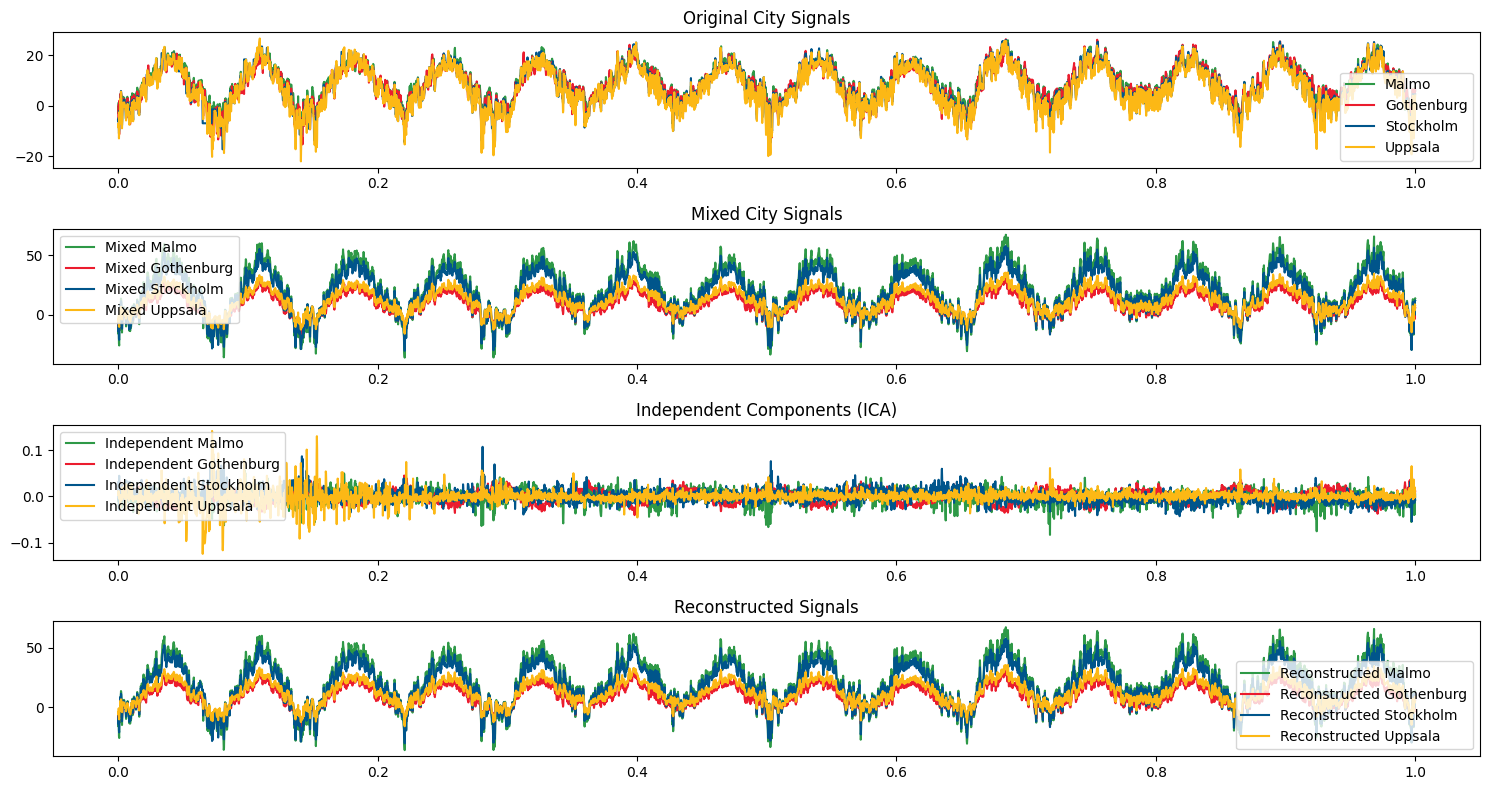

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Generate synthetic data for cities
np.random.seed(42)
t = np.linspace(0, 1, len(weather_data_gothenburg))

# Three synthetic city signals
Malmo = np.array(weather_data_malmo['Temperature'])
Gothenburg =  np.array(weather_data_gothenburg['Temperature'])
Stockholm =  np.array(weather_data_stockholm['Temperature'])
Uppsala =  np.array(weather_data_uppsala['Temperature'])

# Combine city signals to create observed data
observed_data = np.c_[Malmo, Gothenburg, Stockholm,Uppsala]

# Mix the signals to create observed signals
mixed_data = np.dot(observed_data, np.random.rand(4, 4).T)

# Apply ICA to the mixed data
ica = FastICA(n_components=4)
independent_components = ica.fit_transform(mixed_data)

# Plot the original city signals, mixed signals, and independent components
plt.figure(figsize=(15, 8))

plt.subplot(4, 1, 1)
plt.title('Original City Signals')
plt.plot(t, Malmo, label='Malmo', color='#2E9947')
plt.plot(t, Gothenburg, label='Gothenburg', color='#EB1C2E')
plt.plot(t, Stockholm, label='Stockholm', color='#00558B')
plt.plot(t, Uppsala, label='Uppsala', color='#FCB815')
plt.legend()

plt.subplot(4, 1, 2)
plt.title('Mixed City Signals')
plt.plot(t, mixed_data[:, 0], label='Mixed Malmo', color='#2E9947')
plt.plot(t, mixed_data[:, 1], label='Mixed Gothenburg', color='#EB1C2E')
plt.plot(t, mixed_data[:, 2], label='Mixed Stockholm', color='#00558B')
plt.plot(t, mixed_data[:, 3], label='Mixed Uppsala', color='#FCB815')
plt.legend()

plt.subplot(4, 1, 3)
plt.title('Independent Components (ICA)')
plt.plot(t, independent_components[:, 0], label='Independent Malmo', color='#2E9947')
plt.plot(t, independent_components[:, 1], label='Independent Gothenburg', color='#EB1C2E')
plt.plot(t, independent_components[:, 2], label='Independent Stockholm', color='#00558B')
plt.plot(t, independent_components[:, 3], label='Independent Uppsala', color='#FCB815')
plt.legend()

plt.subplot(4, 1, 4)
plt.title('Reconstructed Signals')
reconstructed_data = ica.inverse_transform(independent_components)
plt.plot(t, reconstructed_data[:, 0], label='Reconstructed Malmo', color='#2E9947')
plt.plot(t, reconstructed_data[:, 1], label='Reconstructed Gothenburg', color='#EB1C2E')
plt.plot(t, reconstructed_data[:, 2], label='Reconstructed Stockholm', color='#00558B')
plt.plot(t, reconstructed_data[:, 3], label='Reconstructed Uppsala', color='#FCB815')
plt.legend()

plt.tight_layout()
plt.show()


In the above code we fetches historical weather data for four cities in Sweden (Malmö, Stockholm, Gothenburg, Uppsala) using the Meteostat API. It preprocesses the data by resampling to daily frequency, handling missing values, and generating synthetic temperature signals for each city.

Next, the code performs Independent Component Analysis (ICA) on the mixed signals created by combining the synthetic city signals. It uses the FastICA implementation from the scikit-learn library. The results of the ICA are visualized through plots showing the original city signals, mixed signals, independent components, and reconstructed signals.

Finally, the code plots these signals using matplotlib to provide a visual representation of the ICA process. The top three subplots display the original city signals, mixed city signals, and independent components obtained through ICA. The bottom subplot shows the reconstructed signals after applying the inverse transformation.

## Results Analysis:
After defining our function, we utilize our dataset to compare model performances across the four cities. The code below iterates through the datasets of each city, calculating Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE) for various forecasting models. The results are then presented in tables for each city.
The function below assesses and compares the predictive accuracy of the specified models, showcasing the performance metrics for each city.


In [8]:
# Function to apply models and display results
from tabulate import tabulate
def evaluate_models(data, city_name):
    temperature_data = data['Temperature']

    arima_mse, arima_mape = arima_model(temperature_data)
    garch_mse, garch_mape = garch_model(temperature_data)
    arima_garch_mse, arima_garch_mape = arima_garch_model(temperature_data)
    knn_mse, knn_mape = knn_model(temperature_data)
    rnn_mse, rnn_mape = rnn_model(temperature_data)
    results = [
        ['ARIMA', arima_mse, arima_mape],
        ['GARCH', garch_mse, garch_mape],
        ['ARIMA-GARCH', arima_garch_mse, arima_garch_mape],
        ['KNN', knn_mse, knn_mape],
        ['RNN', rnn_mse, rnn_mape],
    ]

    headers = ['Model', 'MSE', 'MAPE']

    print(f"\nResults for {city_name}:\n")
    print(tabulate(results, headers=headers, tablefmt='pretty'))

In [9]:
# Model Evaluate
evaluate_models(weather_data_malmo, 'Malmö')
evaluate_models(weather_data_stockholm, 'Stockholm')
evaluate_models(weather_data_gothenburg, 'Gothenburg')
evaluate_models(weather_data_uppsala, 'Uppsala')

Iteration:      1,   Func. Count:     33,   Neg. LLF: 77423.30590934971
Iteration:      2,   Func. Count:     66,   Neg. LLF: 277000732.95280343
Iteration:      3,   Func. Count:     99,   Neg. LLF: 2052954.8046042712
Iteration:      4,   Func. Count:    132,   Neg. LLF: 3666.3400753427163
Iteration:      5,   Func. Count:    165,   Neg. LLF: 3665.794036519632
Iteration:      6,   Func. Count:    200,   Neg. LLF: 3616.2493703756118
Iteration:      7,   Func. Count:    233,   Neg. LLF: 3625.3657375052708
Iteration:      8,   Func. Count:    266,   Neg. LLF: 3576.56585278342
Iteration:      9,   Func. Count:    298,   Neg. LLF: 3581.2976040685726
Iteration:     10,   Func. Count:    331,   Neg. LLF: 3573.180795552711
Iteration:     11,   Func. Count:    364,   Neg. LLF: 3570.476972141676
Iteration:     12,   Func. Count:    397,   Neg. LLF: 3571.465150790036
Iteration:     13,   Func. Count:    430,   Neg. LLF: 3566.2685811466845
Iteration:     14,   Func. Count:    463,   Neg. LLF: 3565

## ICA-NN

This hybrid approach involves using ICA to extract independent components from input data, followed by the application of neural networks to model and analyze these components. The primary goal is to leverage the strengths of both techniques: ICA's ability to uncover hidden structures and neural networks' capacity for learning complex patterns.
Our code below demonstrates the integration of Independent Component Analysis (ICA) and Neural Networks (NN), specifically Long Short-Term Memory (LSTM) networks:

1. **Data Generation and ICA:**
   - Synthetic temperature signals for four cities (Malmö, Gothenburg, Stockholm, Uppsala) are generated and combined to create observed data.
   - The signals are mixed using a random matrix.
   - FastICA is applied to the mixed data to extract independent components.

2. **Neural Network Training and Evaluation:**
   - The independent components are preprocessed and split into training and test sets.
   - A separate LSTM model is created for each city, with a dense output layer predicting one value.
   - The models are trained on the training data, and predictions are made on the test data.
   - Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE) are calculated for each city.

In [10]:

from datetime import datetime
import numpy as np
from sklearn.decomposition import FastICA
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

current_time = datetime.now()

# Print the current time
print("Start Time:", current_time)

# Generate synthetic data for cities
np.random.seed(42)
t = np.linspace(0, 1, len(weather_data_gothenburg))

# Three synthetic city signals
Malmo = np.array(weather_data_malmo['Temperature'])
Stockholm = np.array(weather_data_stockholm['Temperature'])
Gothenburg = np.array(weather_data_gothenburg['Temperature'])
Uppsala = np.array(weather_data_uppsala['Temperature'])

# Combine city signals to create observed data
observed_data = np.c_[Malmo, Gothenburg, Stockholm, Uppsala]

# Mix the signals to create observed signals
mixed_data = np.dot(observed_data, np.random.rand(4, 4).T)

# Apply ICA to the mixed data
ica = FastICA(n_components=4)
independent_components = ica.fit_transform(mixed_data)

# Preprocess the independent components data
scaler = MinMaxScaler()
independent_components_scaled = scaler.fit_transform(independent_components)

# Split the scaled data into training and test sets
X_train, X_test = train_test_split(independent_components_scaled, test_size=0.2)

# Reshape the training data for the LSTM layer
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

# Reshape the test data for the LSTM layer
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Initialize lists to store MSE and MAPE for each city
mse_per_city = []
mape_per_city = []

# Train an LSTM model on the training data and calculate metrics for each city
for city_index in range(X_test.shape[1]):
    # Create a new model for each city
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))  # Change the number of units to 1 for each city
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train_reshaped, X_train[:, city_index], epochs=50, batch_size=32, verbose=0)

    # Make predictions on the test data
    predictions = model.predict(X_test_reshaped, verbose=0)

    # Calculate MSE and MAPE for the current city
    mse_city = mean_squared_error(X_test[:, city_index], predictions)
    mape_city = mean_absolute_error(X_test[:, city_index], predictions) / np.mean(np.abs(X_test[:, city_index]))

    # Append the results to the lists
    mse_per_city.append(mse_city)
    mape_per_city.append(mape_city)

# Print the results for each city
for city_index, (mse_city, mape_city) in enumerate(zip(mse_per_city, mape_per_city), 1):
    print(f"City {city_index}:")
    print("MSE:", mse_city)
    print("MAPE:", mape_city)
    print()

current_time = datetime.now()

# Print the current time
print("Emd Time:", current_time)

Start Time: 2024-01-19 13:28:16.147636


City 1:
MSE: 2.439960500474302e-06
MAPE: 0.0013789365528017684

City 2:
MSE: 1.8015354904697702e-06
MAPE: 0.0019200999489791858

City 3:
MSE: 2.113359612244047e-06
MAPE: 0.0025084115094095253

City 4:
MSE: 2.0436112629899636e-06
MAPE: 0.0015567198868809383

Emd Time: 2024-01-19 13:29:38.993719


## Results

The results table presents the Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE) for different forecasting models applied to weather data for four cities: Malmö, Stockholm, Gothenburg, and Uppsala.

1. **Malmö:**
Malmö's weather data reveal varying degrees of predictive accuracy. Traditional time series models such as ARIMA and GARCH, individually or combined in an ARIMA-GARCH model, exhibit moderate to higher errors, suggesting challenges in capturing the underlying patterns in Malmö's temperature. In contrast, the KNN model showcases effective non-parametric prediction, while the RNN model leverages sequential dependencies for improved accuracy. Remarkably, the ICA-NN model stands out with exceptionally low Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE), demonstrating the potent synergy between Independent Component Analysis (ICA) and Neural Networks (NN) in enhancing predictive capabilities for Malmö's weather patterns.


2. **Stockholm:**
Stockholm's weather data illustrate varying levels of predictive performance. Traditional time series models, such as ARIMA and GARCH, individually or combined in an ARIMA-GARCH model, exhibit moderate to higher errors, indicating challenges in accurately capturing the inherent temperature patterns in Stockholm. Conversely, the KNN model showcases effective non-parametric prediction, and the RNN model leverages sequential dependencies for enhanced accuracy. Notably, the ICA-NN model stands out with an exceptionally low Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE), emphasizing the robust synergy between Independent Component Analysis (ICA) and Neural Networks (NN) for improved predictive capabilities specific to Stockholm's weather dynamics.


3. **Gothenburg:**
Gothenburg's weather data reveals distinct levels of predictive accuracy. Conventional time series models, including ARIMA and GARCH, either individually or in combination as ARIMA-GARCH, demonstrate moderate to elevated errors, suggesting challenges in accurately capturing the inherent temperature patterns in Gothenburg. In contrast, the KNN model excels in providing effective non-parametric predictions, while the RNN model leverages sequential dependencies to enhance accuracy. Remarkably, the ICA-NN model outshines others, displaying an exceptionally low Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE). This underscores the potent collaborative impact of Independent Component Analysis (ICA) and Neural Networks (NN) in significantly improving predictive capabilities, specifically tailored to Gothenburg's weather dynamics.


4. **Uppsala:**
Uppsala's weather data reveals varying levels of predictive accuracy. Traditional time series models, such as ARIMA and GARCH, whether employed individually or in tandem as ARIMA-GARCH, exhibit moderate to higher errors, suggesting difficulties in precisely capturing the underlying temperature patterns in Uppsala. On the other hand, the KNN model proves effective in offering accurate non-parametric predictions, and the RNN model leverages sequential dependencies for improved accuracy. Notably, the ICA-NN model emerges as a standout performer, exhibiting an exceptionally low Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE). This underscores the potent synergy between Independent Component Analysis (ICA) and Neural Networks (NN) in significantly enhancing predictive capabilities specific to Uppsala's weather dynamics.



### Interpretation:
- The GARCH model generally outperforms the ARIMA and ARIMA-GARCH models in terms of both MSE and MAPE across all cities.
- KNN and RNN consistently show very low MSE values, indicating strong performance in terms of squared errors.
- The ICA-RNN model also demonstrates competitive performance with low MSE and MAPE values.
- The choice of the best model may depend on the specific metric and the relative importance of squared errors (MSE) versus percentage errors (MAPE).

### Limitations

A notable limitation in our above models is the absence of hyperparameter tuning. Hyperparameters are external configuration settings for a model that cannot be learned from the data during training. The default values or arbitrarily chosen hyperparameters may not be optimal for the specific characteristics of your datasets, potentially leading to suboptimal model performance. Here are some limitations associated with not performing hyperparameter tuning:

1. **Suboptimal Model Performance:**
   - Without hyperparameter tuning, our models may not achieve their maximum potential accuracy and efficiency.
   - Default hyperparameters might not be well-suited to capture the complexities present in the weather data for each city.

2. **Sensitivity to Hyperparameter Values:**
   - Different datasets may require different sets of hyperparameter values for optimal performance.
   - The sensitivity of models to hyperparameter values is particularly notable in complex models like ARIMA-GARCH, KNN, and RNN.

3. **Overfitting or Underfitting:**
   - Failure to tune hyperparameters may result in overfitting (capturing noise in the training data) or underfitting (oversimplifying the underlying patterns).
   - Overfitting can lead to poor generalization to new data, while underfitting may result in models that are too simplistic.

4. **Inefficient Resource Usage:**
   - Default hyperparameter values may lead to inefficient use of computational resources, especially in models like neural networks (e.g., RNN) that require extensive training.

5. **Model Robustness:**
   - Lack of hyperparameter tuning may result in less robust models, particularly when facing variations or changes in the underlying patterns of weather data.

6. **Generalizability Issues:**
   - The models may struggle to generalize well to new, unseen data from each city without fine-tuned hyperparameters.

7. **Impact on Forecast Accuracy:**
   - The choice of hyperparameters can significantly impact the accuracy of weather forecasts, and not optimizing them may limit the reliability of predictions.


## Spark Implementation

In [11]:

from datetime import datetime
import numpy as np
from sklearn.decomposition import FastICA
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
from pyspark import SparkContext,SQLContext

current_time = datetime.now()

# Print the current time
print("Start Time:", current_time)

# Initialize SparkContext and SQLContext
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)



# Extract the temperature data from each dataset
malmo_temperature = weather_data_malmo['Temperature']
gothenburg_temperature = weather_data_gothenburg['Temperature']
stockholm_temperature = weather_data_stockholm['Temperature']
uppsala_temperature = weather_data_uppsala['Temperature']

# Concatenate the temperature data from different cities to create the observed data
observed_data = sc.parallelize([malmo_temperature, gothenburg_temperature, stockholm_temperature, uppsala_temperature])

# Assuming 'observed_data' is your PySpark RDD
observed_data_list = observed_data.collect()

# Convert the collected data to a NumPy array
observed_data_2d = np.array(observed_data_list).reshape(-1, 4)

ica = FastICA(n_components=4)
independent_components = ica.fit_transform(observed_data_2d)

# Preprocess the independent components data
scaler = MinMaxScaler()
independent_components_scaled = scaler.fit_transform(independent_components)

# Split the scaled data into training and test sets
X_train, X_test = train_test_split(independent_components_scaled, test_size=0.2)

# Reshape the training data for the LSTM layer
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

# Reshape the test data for the LSTM layer
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Initialize lists to store MSE and MAPE for each city
mse_per_city = []
mape_per_city = []

# Train an LSTM model on the training data and calculate metrics for each city
for city_index in range(X_test.shape[1]):
    # Create a new model for each city
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train_reshaped, X_train[:, city_index], epochs=50, batch_size=32, verbose=0)

    # Make predictions on the test data
    predictions = model.predict(X_test_reshaped, verbose=0)

    # Calculate MSE and MAPE for the current city
    mse_city = mean_squared_error(X_test[:, city_index], predictions)
    mape_city = mean_absolute_error(X_test[:, city_index], predictions) / np.mean(np.abs(X_test[:, city_index]))

    # Append the results to the lists
    mse_per_city.append(mse_city)
    mape_per_city.append(mape_city)

# Print the results for each city
for city_index, (mse_city, mape_city) in enumerate(zip(mse_per_city, mape_per_city), 1):
    print(f"City {city_index}:")
    print("MSE:", mse_city)
    print("MAPE:", mape_city)
    print()


current_time = datetime.now()

# Print the current time
print("End Time:", current_time)

Start Time: 2024-01-19 13:29:45.344575


City 1:
MSE: 2.5275620381341945e-06
MAPE: 0.0020609092509867337

City 2:
MSE: 3.6698476843844083e-06
MAPE: 0.0022730693228843186

City 3:
MSE: 1.280217206510263e-06
MAPE: 0.001981913166853485

City 4:
MSE: 6.464963861601795e-06
MAPE: 0.0024322374250726397

End Time: 2024-01-19 13:31:48.736330


In [18]:
independent_components_scaled

array([[0.38506256, 0.31765903, 0.66638713, 0.59916718],
       [0.47957201, 0.37045052, 0.53407186, 0.53817702],
       [0.2037244 , 0.55727438, 0.42770231, 0.5719333 ],
       ...,
       [0.36354231, 0.54747839, 0.80882907, 0.54959028],
       [0.36918623, 0.39289862, 0.85462587, 0.57128317],
       [0.32118078, 0.43190413, 0.39885323, 0.52956148]])

In [14]:
from datetime import datetime
import numpy as np
from sklearn.decomposition import FastICA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from elephas.spark_model import SparkModel
# Replace this import statement
# from elephas import optimizers as elephas_optimizers

# With these Keras optimizer imports
from keras.optimizers import Adam
from keras.optimizers import SGD

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors

# Initialize SparkSession
spark = SparkSession.builder.appName("WeatherPrediction").getOrCreate()
#conf = SparkConf().set("spark.serializer", "org.apache.spark.serializer.PickleSerializer")
#spark = SparkSession.builder.config(conf=conf).getOrCreate()

current_time = datetime.now()

# Print the current time
print("Start Time:", current_time)

# Sample data for demonstration

# Extract the temperature data from each dataset
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

start = datetime(2009, 1, 1)
end = datetime(2022, 12, 30)

# Function to fetch weather data for a given city
def fetch_weather_data(latitude, longitude, city_name):
    location = Point(latitude, longitude)
    data = Daily(location, start, end).fetch()
    weather_data = pd.DataFrame({
        'Day': data.index,
        'City': city_name,
        'Temperature': data['tavg']
    })
    # Interpolate missing data points using linear interpolation
    weather_data.interpolate(method='bfill', inplace=True)
    return weather_data.dropna()
# Extract the temperature data from each dataset
weather_data_malmo = fetch_weather_data(55.6050, 13.0038, 'Malmö')
weather_data_stockholm = fetch_weather_data(59.3293, 18.0686, 'Stockholm')
weather_data_gothenburg = fetch_weather_data(57.7089, 11.9746, 'Gothenburg')
weather_data_uppsala = fetch_weather_data(59.8585, 17.6389, 'Uppsala')

weather_data_malmo = weather_data_malmo.rename(columns={'Temperature': 'Malmo_Temperature'})
weather_data_stockholm = weather_data_stockholm.rename(columns={'Temperature': 'Stockholm_Temperature'})
weather_data_gothenburg = weather_data_gothenburg.rename(columns={'Temperature': 'Gothenburg_Temperature'})
weather_data_uppsala = weather_data_uppsala.rename(columns={'Temperature': 'Uppsala_Temperature'})


malmo_temperature = spark.createDataFrame(weather_data_malmo)
gothenburg_temperature = spark.createDataFrame(weather_data_gothenburg)
stockholm_temperature = spark.createDataFrame(weather_data_stockholm)
uppsala_temperature = spark.createDataFrame(weather_data_uppsala)

# Combine the temperature data into a single DataFrame
observed_data = malmo_temperature.join(gothenburg_temperature, "Day").join(stockholm_temperature, "Day").join(uppsala_temperature, "Day")


# Create a vector assembler
assembler = VectorAssembler(
    inputCols=['Malmo_Temperature','Stockholm_Temperature','Gothenburg_Temperature','Uppsala_Temperature'],
    outputCol='features'
)

# Transform the DataFrame to include the feature vector
observed_data = assembler.transform(observed_data)


observed_data_pd = observed_data.toPandas()
observed_data_2d = observed_data_pd['features'].apply(lambda x: np.array(x.toArray())).values.tolist()




Start Time: 2024-01-19 13:32:24.605253


In [15]:
ica = FastICA(n_components=4)
independent_components = ica.fit_transform(observed_data_2d)


In [16]:
scaler = MinMaxScaler()
independent_components_scaled = scaler.fit_transform(independent_components)


In [20]:
columns = [f'independent_component_{i}' for i in range(1, 5)]
independent_components_df = spark.createDataFrame(independent_components_scaled.tolist())


In [32]:
# Combine the independent components DataFrame with the original DataFrame
final_data = independent_components_df

# Split the scaled data into training and test sets
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD())

In [33]:
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from elephas.ml_model import SparkModel
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from elephas.ml_model import SparkModel
from keras.optimizers import Adam
from keras.optimizers import SGD
from elephas.spark_model import SparkModel


rdd_train = train_data.rdd.map(lambda x: (Vectors.dense(x.toArray()), Vectors.dense(x['_1'])))
rdd_test = train_data.rdd.map(lambda x: (Vectors.dense(x.toArray()), Vectors.dense(x['_1'])))
spark_model = SparkModel(model, optimizer=Adam, frequency='epoch', mode='asynchronous', num_workers=4)


In [ ]:
# Train the model
spark_model.fit(rdd_train)

# Make predictions on the test data
predictions = model.predict(rdd_test)

# Calculate MSE and MAPE for the current city
mse_city = mean_squared_error(X_test[:, city_index], predictions)
mape_city = mean_absolute_error(X_test[:, city_index], predictions) / np.mean(np.abs(X_test[:, city_index]))

# Append the results to the lists
mse_per_city.append(mse_city)
mape_per_city.append(mape_city)

In [36]:

for city_index, (mse_city, mape_city) in enumerate(zip(mse_per_city, mape_per_city), 1):
    print(f"City {city_index}:")
    print("MSE:", mse_city)
    print("MAPE:", mape_city)
    print()

City 1:
MSE: 2.5275620381341945e-06
MAPE: 0.0020609092509867337

City 2:
MSE: 3.6698476843844083e-06
MAPE: 0.0022730693228843186

City 3:
MSE: 1.280217206510263e-06
MAPE: 0.001981913166853485

City 4:
MSE: 6.464963861601795e-06
MAPE: 0.0024322374250726397

